In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.pipeline import make_pipeline

In [2]:
# データの読み込み
df = pd.read_csv("ks-projects-201801.csv")
display(df.info())
print(df.isnull().sum())
display(df.describe())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


None

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


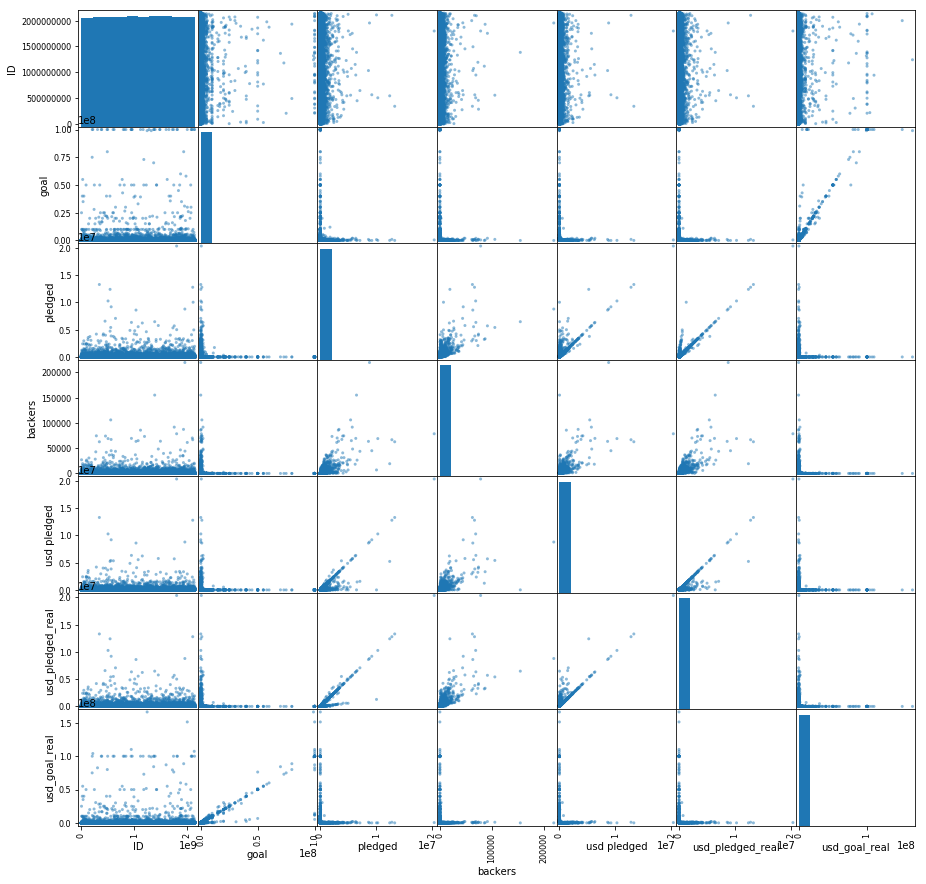

In [3]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

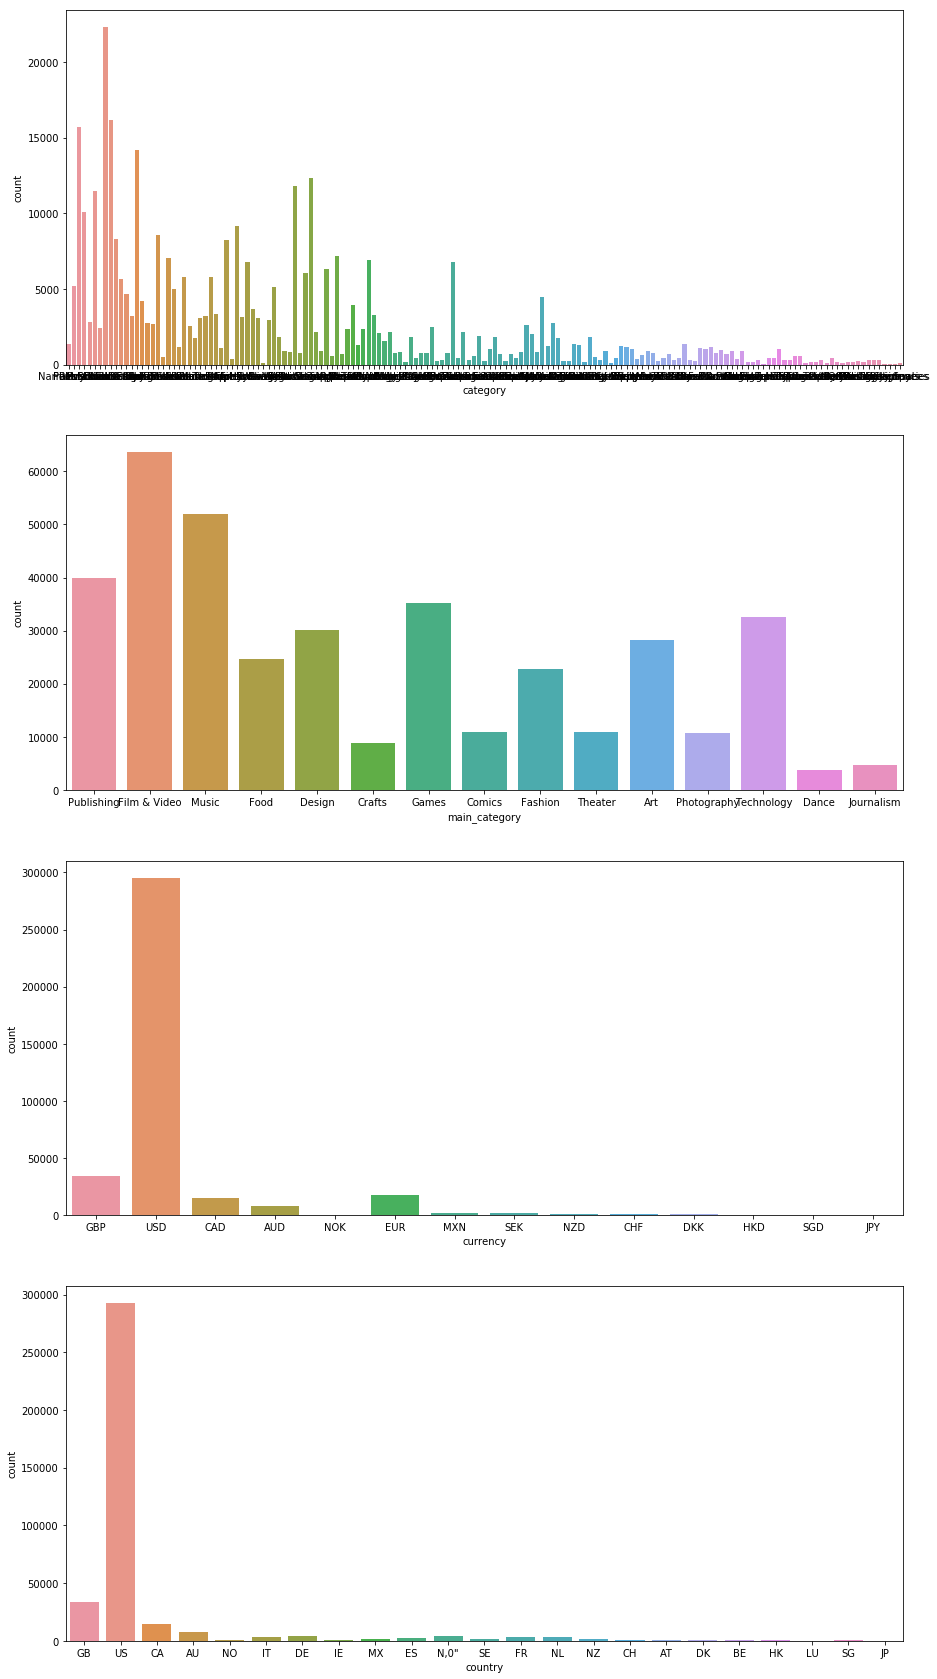

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

In [4]:
fig,ax = plt.subplots(4,1,figsize=(15,30))
sns.countplot(df.category,ax=ax[0])
sns.countplot(df.main_category,ax=ax[1])
sns.countplot(df.currency,ax=ax[2])
sns.countplot(df.country,ax=ax[3])
plt.show()
df.category.value_counts()

In [5]:
#前処理　福本さん参考
#この段階で列削除するのは早い？
#nameの文字数に相関性あり？
#日付は日数で計算

# 使わない列を削除
df = df.drop(columns=["ID","currency","goal","pledged","backers","usd pledged"])


# successfulとfailed以外は除く
df = df[ (df["state"]=="successful") | (df["state"]=="failed") ]

# US以外は除く
df = df[ (df["country"]=="US") ]
# 使わない列を削除
df = df.drop(columns=["country"])

# main_categoryがFilm & Videoのもの以外は除く
#df = df[ (df["main_category"]=="Film & Video") ]
#df = df.drop(columns=["main_category"])

# categoryが Product Design 以外は除く
df = df[ df["category"]=="Product Design" ]
df = df.drop(columns=["category","main_category"])


# (name が)欠損しているデータを除く
df = df.dropna()

# successfulとfailed以外は除く
df = df[ (df["state"]=="successful") | (df["state"]=="failed") ]

# nameから文字数と単語数をカウントし，それぞれ説明変数にする．
df["name_len"] = df["name"].apply(len) # 文字数
df["name_words"] = df["name"].str.count(" ") # 単語数（≒スペース数）
df = df.drop(columns="name") # 元のname列を削除
    
# 日付を2000年1月0日からの経過日数に変換する関数を定義
# 面倒なのですべて1年は365日で，1月は30日として粗く変換
# 20yy-mm-dd を仮定
def date2days(s):
    y = int(s[2])*10 + int(s[3])
    m = int(s[5])*10 + int(s[6])
    d = int(s[8])*10 + int(s[9])
    days = y*365 + m*30 + d
    return days
# deadline
df["deadline_num"] = df["deadline"].apply(date2days)
df = df.drop(columns="deadline")
#launched
df["launched_num"] = df["launched"].apply(date2days)
df = df.drop(columns="launched")

In [6]:
# deadlineからlaunchedを引いて募集期間 project_length 列を作成
df["project_length"] = df["deadline_num"].values - df["launched_num"].values

In [7]:
# 使わない列を削除
df = df.drop(columns=["deadline_num"])

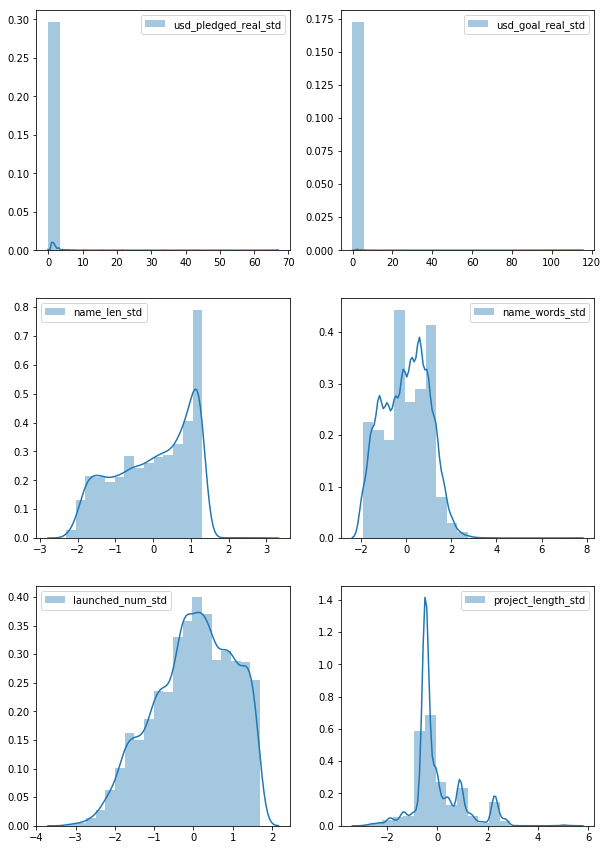

In [8]:
# 標準化
stdsc = StandardScaler()
#df[["usd_pledged_real_std","usd_goal_real_std","name_len_std","deadline_num_std","launched_num_std"]] = stdsc.fit_transform(df[["usd_pledged_real","usd_goal_real","name_len","deadline_num","launched_num"]].values.astype(float))
df["usd_pledged_real_std"] = stdsc.fit_transform(df[["usd_pledged_real"]].values.astype(float))
df["usd_goal_real_std"] = stdsc.fit_transform(df[["usd_goal_real"]].values.astype(float))
df["name_len_std"] = stdsc.fit_transform(df[["name_len"]].values.astype(float))
df["name_words_std"] = stdsc.fit_transform(df[["name_words"]].values.astype(float))
df["launched_num_std"] = stdsc.fit_transform(df[["launched_num"]].values.astype(float))
df["project_length_std"] = stdsc.fit_transform(df[["project_length"]].values.astype(float))

fig,ax = plt.subplots(3,2,figsize=(10,15))
sns.distplot(df.usd_pledged_real_std.values,bins=20,ax=ax[0,0],label="usd_pledged_real_std")
sns.distplot(df.usd_goal_real_std.values,bins=20,ax=ax[0,1],label="usd_goal_real_std")
sns.distplot(df.name_len_std.values,bins=20,ax=ax[1,0],label="name_len_std")
sns.distplot(df.name_words_std.values,bins=20,ax=ax[1,1],label="name_words_std")
sns.distplot(df.launched_num_std.values,bins=20,ax=ax[2,0],label="launched_num_std")
sns.distplot(df.project_length_std.values,bins=20,ax=ax[2,1],label="project_length_std")
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[2,0].legend()
ax[2,1].legend()
plt.show()

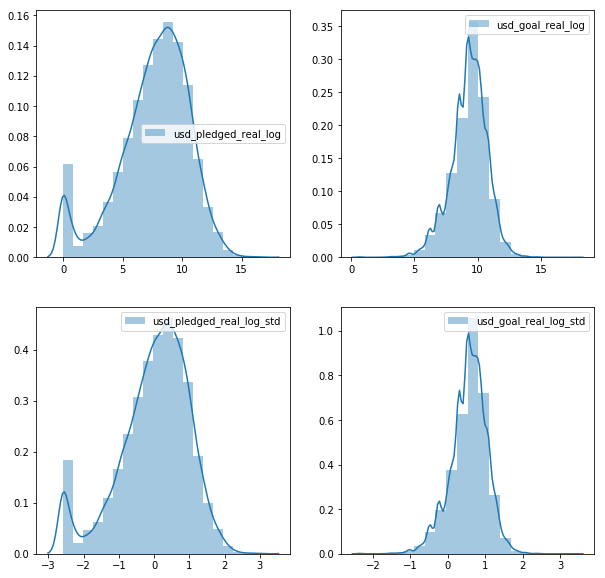

,name_len_std,name_words_std,launched_num_std,project_length_std,usd_pledged_real_log_std,usd_goal_real_log_std
count,1.373200e+04,1.373200e+04,1.373200e+04,1.373200e+04,1.373200e+04,13732.000000
mean,-1.363120e-16,9.055125e-18,-1.311336e-16,-1.680049e-16,-2.801793e-16,0.560613
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.479606
min,-2.314780e+00,-1.902651e+00,-3.228528e+00,-3.056229e+00,-2.578754e+00,-2.344826
25%,-8.215858e-01,-8.347378e-01,-7.094519e-01,-5.285074e-01,-5.268524e-01,0.295760
50%,1.738771e-01,2.331750e-01,7.536171e-02,-4.348881e-01,1.370182e-01,0.591181
75%,9.204742e-01,5.891459e-01,8.026330e-01,4.076858e-01,6.991528e-01,0.874488
max,2.849183e+00,7.352593e+00,1.692941e+00,5.463129e+00,3.100504e+00,3.404068


In [9]:
# 先生にアドバイスしてもらった対数変換してみる。
df["usd_pledged_real_log"] = (df["usd_pledged_real"]+1).apply(np.log) # log(0)を避けるため、1を足した
df["usd_goal_real_log"] = (df["usd_goal_real"]+1).apply(np.log) # 最後にpledgedとgoalを比較するため、前処理は同じにしたい。なので1を足す。

#df[["usd_pledged_real_log_std","usd_goal_real_std"]] = stdsc.fit_transform(df[["usd_pledged_real_log","usd_goal_real_log"]].values.astype(float))
df["usd_pledged_real_log_std"] = stdsc.fit_transform(df[["usd_pledged_real_log"]].values.astype(float))
df["usd_goal_real_log_std"] = stdsc.transform(df[["usd_goal_real_log"]].values.astype(float))


fig,ax = plt.subplots(2,2,figsize=(10,10))
sns.distplot(df.usd_pledged_real_log.values,bins=20,ax=ax[0,0],label="usd_pledged_real_log")
sns.distplot(df.usd_goal_real_log.values,bins=20,ax=ax[0,1],label="usd_goal_real_log")
sns.distplot(df.usd_pledged_real_log_std.values,bins=20,ax=ax[1,0],label="usd_pledged_real_log_std")
sns.distplot(df.usd_goal_real_log_std.values,bins=20,ax=ax[1,1],label="usd_goal_real_log_std")
#sns.distplot(df.name_len_std.values,bins=20,ax=ax[1,0])
#sns.distplot(df.deadline_num_std.values,bins=20,ax=ax[1,1])
#sns.distplot(df.launched_num_std.values,bins=20,ax=ax[2,0])
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.show()

# 不要な列を削除
df = df.drop(columns=["usd_pledged_real","usd_pledged_real_std","usd_pledged_real_log","usd_goal_real","usd_goal_real_std","usd_goal_real_log","name_len","name_words","launched_num","project_length"])

display(df.describe())

In [10]:
y = df.usd_pledged_real_log_std.values
X = df.drop(['usd_pledged_real_log_std'], axis=1).values # 最後に分類問題の答え合わせをするのにstateがどこか分からないといけないので，とりあえずここに入れておく．
#X = df.drop(['usd_pledged_real_log_std',"state"], axis=1).values

# ホールドアウト法
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

In [11]:
# usd_pledged_realを推定する重回帰モデルを作成
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:,1:], y_train) # 0列目はstate

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# 値を予測
y_train_pred = model.predict(X_train[:,1:]) # 0列目はstate
y_test_pred  = model.predict(X_test[:,1:]) # 0列目はstate

# MSE, MAE, RMSEを計算
mse_train = mean_squared_error(y_train, y_train_pred) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
rmse_train = np.sqrt(mse_train)
print("MSE(train) = %s"%round(mse_train,3) )  
print("MAE(trian) = %s"%round(mae_train,3) )
print("RMSE(train) = %s"%round(rmse_train, 3) )
mse_test = mean_squared_error(y_test, y_test_pred) 
mae_test = mean_absolute_error(y_test, y_test_pred) 
rmse_test = np.sqrt(mse_test)
print("MSE(test) = %s"%round(mse_test,3) )  
print("MAE(test) = %s"%round(mae_test,3) )
print("RMSE(test) = %s"%round(rmse_test, 3) )

MSE(train) = 0.896
MAE(trian) = 0.736
RMSE(train) = 0.947
MSE(test) = 0.928
MAE(test) = 0.751
RMSE(test) = 0.963


In [13]:
# 回帰モデルの結果y_predとusd_goal_realを比較して成否を判定（前処理をそろえているのでそのまま比較可能）
y2_train_pred = np.where( y_train_pred >= X_train[:,5], True, False ) # Xの5列目が usd_goal_real
y2_test_pred = np.where( y_test_pred >= X_test[:,5], True, False ) # Xの5列目が usd_goal_real


# 正解データをブール型に加工
y2_train = np.where( X_train[:,0]=="successful", True, False )
y2_test  = np.where( X_test[:,0]=="successful", True, False )

In [14]:

from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

print("訓練誤差")
# 正答率を計算
accuracy_train =  accuracy_score(y2_train, y2_train_pred)
print('正答率（Accuracy） = {:.3%}'.format(accuracy_train))
# Precision, Recall, F1-scoreを計算
precision_train, recall_train, f1_score_train, _ = precision_recall_fscore_support(y2_train, y2_train_pred)
# カテゴリ「成功」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3%}'.format(precision_train[1]))
print('再現率（Recall） = {:.3%}'.format(recall_train[1]))
print('F1値（F1-score） = {:.3%}'.format(f1_score_train[1]))
# 予測値と正解のクロス集計
conf_mat_train = pd.DataFrame(confusion_matrix(y2_train, y2_train_pred), 
                        index=['正解 = failed', '正解 = successful'], 
                        columns=['予測 = failed', '予測 = successful'])
display(conf_mat_train)

#################################################################################
print("汎化誤差")
# 正答率を計算
accuracy_test =  accuracy_score(y2_test, y2_test_pred)
print('正答率（Accuracy） = {:.3%}'.format(accuracy_test))
# Precision, Recall, F1-scoreを計算
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y2_test, y2_test_pred)
# カテゴリ「成功」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3%}'.format(precision_test[1]))
print('再現率（Recall） = {:.3%}'.format(recall_test[1]))
print('F1値（F1-score） = {:.3%}'.format(f1_score_test[1]))
# 予測値と正解のクロス集計
conf_mat_test = pd.DataFrame(confusion_matrix(y2_test, y2_test_pred), 
                        index=['正解 = failed', '正解 = successful'], 
                        columns=['予測 = failed', '予測 = successful'])
display(conf_mat_test)

訓練誤差
正答率（Accuracy） = 59.345%
適合率（Precision） = 69.340%
再現率（Recall） = 8.307%
F1値（F1-score） = 14.836%


,予測 = failed,予測 = successful
正解 = failed,6130,172
正解 = successful,4294,389


汎化誤差
正答率（Accuracy） = 59.519%
適合率（Precision） = 65.035%
再現率（Recall） = 8.052%
F1値（F1-score） = 14.330%


,予測 = failed,予測 = successful
正解 = failed,1542,50
正解 = successful,1062,93
